# **설명 가능한 인공지능(Explainable AI)**

##  **1. 필요한 라이브러리 불러오기**


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #for plotting
from sklearn.ensemble import RandomForestClassifier #for the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz #plot tree
from sklearn.metrics import * #for model evaluation
from sklearn.model_selection import train_test_split #for data splitting
import eli5 #for purmutation importance
from eli5.sklearn import PermutationImportance
from sklearn.inspection import PartialDependenceDisplay
import shap #for SHAP values
shap.initjs()
import sklearn.inspection
import lime
from lime import lime_tabular
np.random.seed(123) #ensure reproducibility
pd.options.mode.chained_assignment = None  #hide any pandas warnings

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


##  **2. 데이터 불러오기**
* UCI Heart Disease  
* 심장 질환의 존재 여부를 예측하는 데 사용되는 의료 데이터셋

In [3]:
dt = pd.read_csv("dataset_heart.csv")
dt.head(10)

age  sex   chest pain type  resting blood pressure  serum cholestoral  \
0   70     1                4                     130                322   
1   67     0                3                     115                564   
2   57     1                2                     124                261   
3   64     1                4                     128                263   
4   74     0                2                     120                269   
5   65     1                4                     120                177   
6   56     1                3                     130                256   
7   59     1                4                     110                239   
8   60     1                4                     140                293   
9   63     0                4                     150                407   

   fasting blood sugar  resting electrocardiographic results  max heart rate  \
0                    0                                     2             109   
1                    0                                     2             160   
2                    0                                     0             141   
3                    0                                     0             105   
4                    0                                     2             121   
5                    0                                     0             140   
6                    1                                     2             142   
7                    0                                     2             142   
8                    0                                     2             170   
9                    0                                     2             154   

   exercise induced angina  oldpeak  ST segment  major vessels  thal  \
0                        0      2.4           2              3     3   
1                        0      1.6           2              0     7   
2                        0      0.3           1              0     7   
3                        1      0.2           2              1     7   
4                        1      0.2           1              1     3   
5                        0      0.4           1              0     7   
6                        1      0.6           2              1     6   
7                        1      1.2           2              1     7   
8                        0      1.2           2              2     7   
9                        0      4.0           2              3     7   

   heart disease  
0              2  
1              1  
2              2  
3              1  
4              1  
5              1  
6              2  
7              2  
8              2  
9              2

In [4]:
dt['heart disease'] = dt['heart disease'].replace({1: 0, 2: 1})

#dt = pd.read_csv("dataset_heart.csv")
dt = pd.read_csv("heart.csv")
dt.head(10)


```
  - 1. age: 환자의 나이     
  - 2. sex: 성별     
  - 3. chest pain type  (4 values): 흉통 유형  (1: 전형적 협심증 2: 비전형적 협심증 3: 비흉통성 통증 4: 무증상)   
  - 4. resting blood pressure: 안정 시 혈압 (mm Hg 단위)
  - 5. serum cholestoral in mg/dl: 혈청 콜레스테롤 농도 (mg/dl)    
  - 6. fasting blood sugar > 120 mg/dl: 공복 혈당 (> 120 mg/dl일 때 1, 아니면 0)     
  - 7. resting electrocardiographic results (values 0,1,2): 안정 시 심전도 결과( 0: 정상 1: ST-T 파형 이상 (비특이적 이상 또는 T파 반전) 2: 좌심실 비대 가능성 (Estes 기준))
  - 8. maximum heart rate achieved: 운동 중 기록된 최대 심박수
  - 9. exercise induced angina: 운동 후 흉통 발생 여부 (1: 있음, 0: 없음)
  - 10. oldpeak = ST depression induced by exercise relative to rest: 운동 후 ST 하강량(휴식 대비)
  - 11. the slope of the peak exercise ST segment: 운동 중 ST 세그먼트의 기울기(1: 상승형 2: 평평형 3: 하강형)      
  - 12. number of major vessels (0-3) colored by flourosopy: 형광 투시술로 확인된 주요 혈관 수 (0~3)   
  - 13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect: 혈류 이상 유형
  - 14. Heart disease(Absence (1) or presence (2) of heart disease): 심장병 유무 

```




In [5]:
dt.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [6]:
dt.head(10)

age  sex  chest_pain_type  resting_blood_pressure  cholesterol  \
0   70    1                4                     130          322   
1   67    0                3                     115          564   
2   57    1                2                     124          261   
3   64    1                4                     128          263   
4   74    0                2                     120          269   
5   65    1                4                     120          177   
6   56    1                3                     130          256   
7   59    1                4                     110          239   
8   60    1                4                     140          293   
9   63    0                4                     150          407   

   fasting_blood_sugar  rest_ecg  max_heart_rate_achieved  \
0                    0         2                      109   
1                    0         2                      160   
2                    0         0                      141   
3                    0         0                      105   
4                    0         2                      121   
5                    0         0                      140   
6                    1         2                      142   
7                    0         2                      142   
8                    0         2                      170   
9                    0         2                      154   

   exercise_induced_angina  st_depression  st_slope  num_major_vessels  \
0                        0            2.4         2                  3   
1                        0            1.6         2                  0   
2                        0            0.3         1                  0   
3                        1            0.2         2                  1   
4                        1            0.2         1                  1   
5                        0            0.4         1                  0   
6                        1            0.6         2                  1   
7                        1            1.2         2                  1   
8                        0            1.2         2                  2   
9                        0            4.0         2                  3   

   thalassemia  target  
0            3       1  
1            7       0  
2            7       1  
3            7       0  
4            3       0  
5            7       0  
6            6       1  
7            7       1  
8            7       1  
9            7       1

In [7]:
dt['target'].unique()

array([1, 0])

### **간단한 EDA**

- 데이터 크기 확인

In [8]:
print("\n데이터 크기 (행, 열):")
print(dt.shape)


데이터 크기 (행, 열):
(270, 14)


- 데이터 타입 확인

In [9]:
print("\n데이터 타입:")
print(dt.dtypes)


데이터 타입:
age                          int64
sex                          int64
chest_pain_type              int64
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar          int64
rest_ecg                     int64
max_heart_rate_achieved      int64
exercise_induced_angina      int64
st_depression              float64
st_slope                     int64
num_major_vessels            int64
thalassemia                  int64
target                       int64
dtype: object


- 데이터 결측치 확인

In [10]:
print(dt.isnull().sum())

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
num_major_vessels          0
thalassemia                0
target                     0
dtype: int64


- 데이터 중복 확인

In [11]:
print("\n중복 데이터 개수:")
print(dt.duplicated().sum())


중복 데이터 개수:
0


- 변수별 분포 확인

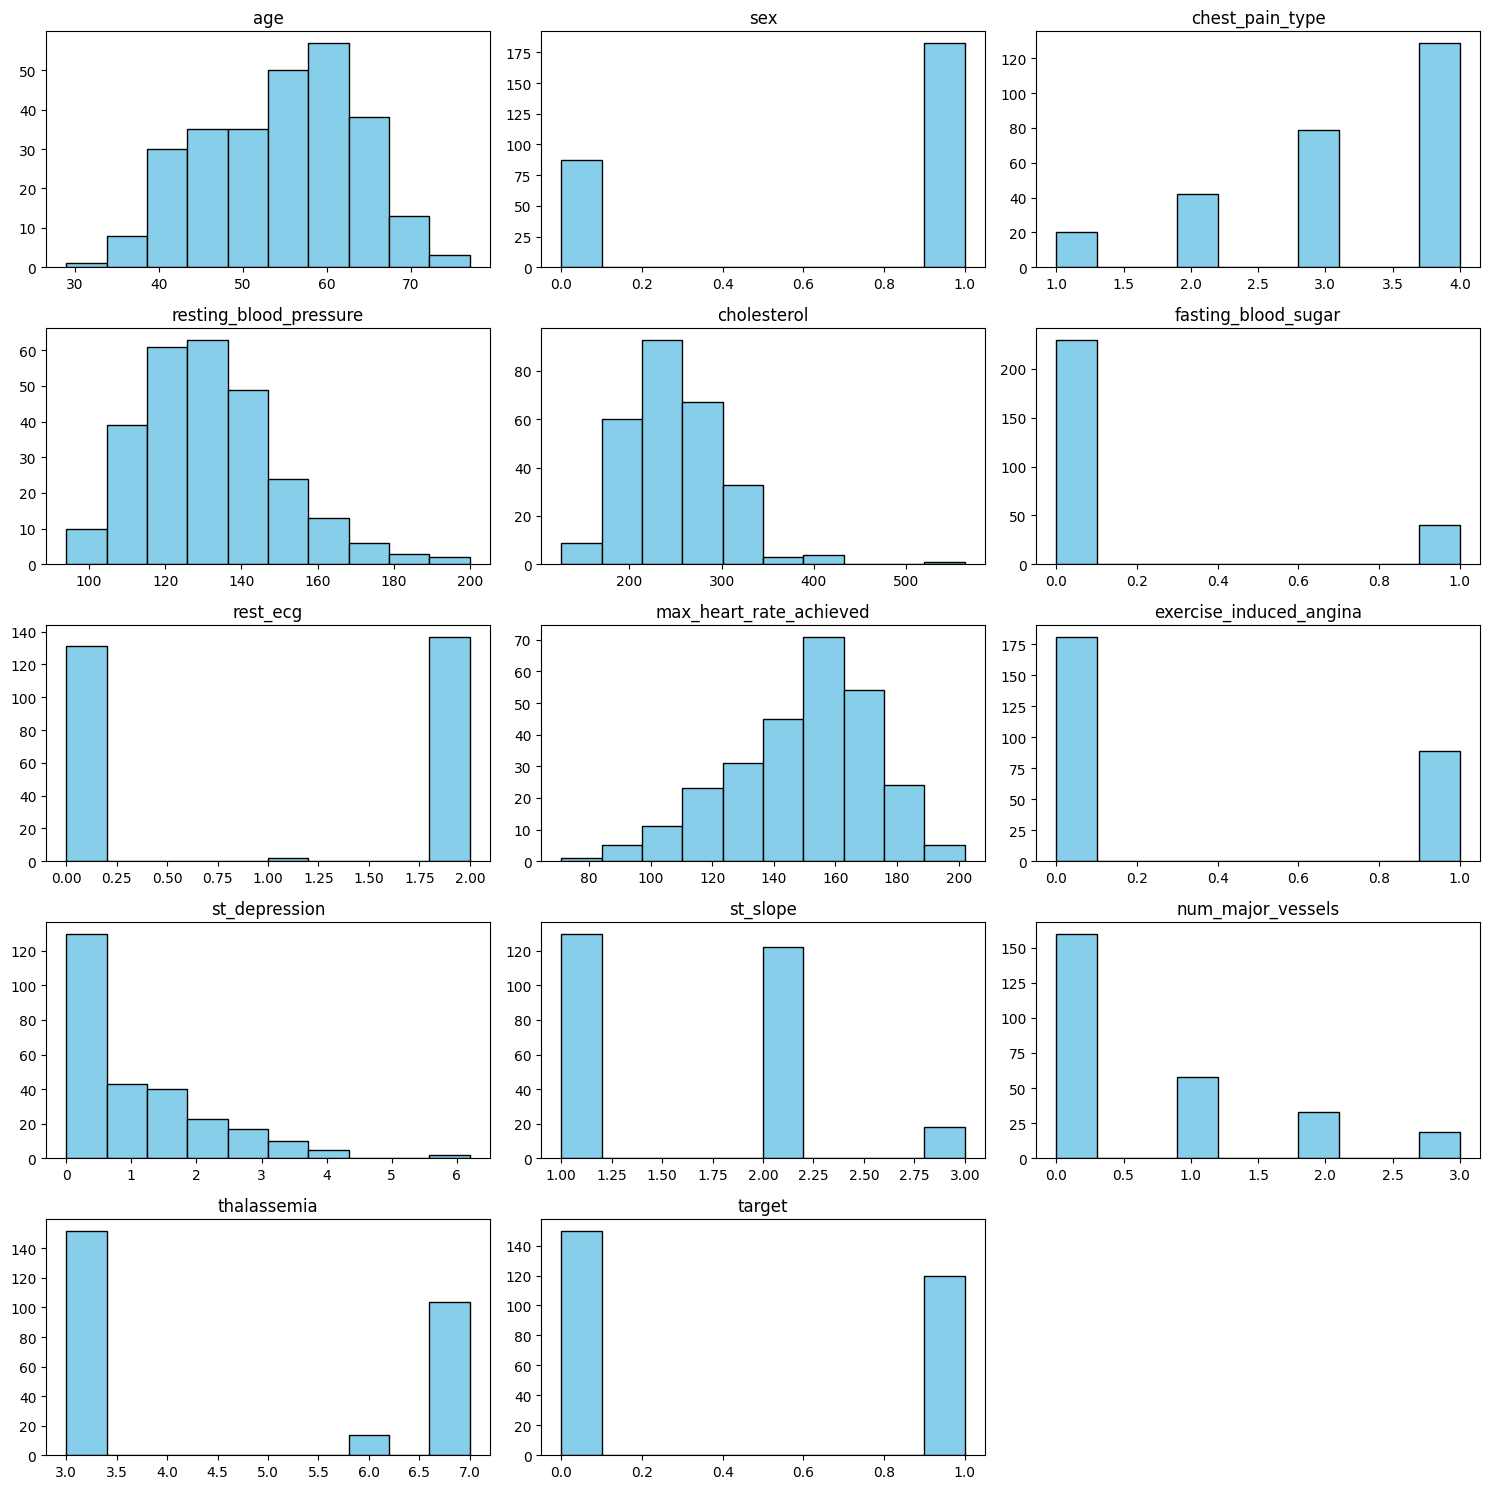

In [12]:
# 변수별 히스토그램
plt.figure(figsize=(15, 15))
columns = dt.columns
for i, column in enumerate(columns):
    plt.subplot(5, 3, i + 1)
    plt.hist(dt[column], bins=10, color='skyblue', edgecolor='black')
    plt.title(column)
    plt.tight_layout()

plt.show()

- 기본 통계량 확인

In [13]:
dt.describe()

age         sex  chest_pain_type  resting_blood_pressure  \
count  270.000000  270.000000       270.000000              270.000000   
mean    54.433333    0.677778         3.174074              131.344444   
std      9.109067    0.468195         0.950090               17.861608   
min     29.000000    0.000000         1.000000               94.000000   
25%     48.000000    0.000000         3.000000              120.000000   
50%     55.000000    1.000000         3.000000              130.000000   
75%     61.000000    1.000000         4.000000              140.000000   
max     77.000000    1.000000         4.000000              200.000000   

       cholesterol  fasting_blood_sugar    rest_ecg  max_heart_rate_achieved  \
count   270.000000           270.000000  270.000000               270.000000   
mean    249.659259             0.148148    1.022222               149.677778   
std      51.686237             0.355906    0.997891                23.165717   
min     126.000000             0.000000    0.000000                71.000000   
25%     213.000000             0.000000    0.000000               133.000000   
50%     245.000000             0.000000    2.000000               153.500000   
75%     280.000000             0.000000    2.000000               166.000000   
max     564.000000             1.000000    2.000000               202.000000   

       exercise_induced_angina  st_depression    st_slope  num_major_vessels  \
count               270.000000      270.00000  270.000000         270.000000   
mean                  0.329630        1.05000    1.585185           0.670370   
std                   0.470952        1.14521    0.614390           0.943896   
min                   0.000000        0.00000    1.000000           0.000000   
25%                   0.000000        0.00000    1.000000           0.000000   
50%                   0.000000        0.80000    2.000000           0.000000   
75%                   1.000000        1.60000    2.000000           1.000000   
max                   1.000000        6.20000    3.000000           3.000000   

       thalassemia      target  
count   270.000000  270.000000  
mean      4.696296    0.444444  
std       1.940659    0.497827  
min       3.000000    0.000000  
25%       3.000000    0.000000  
50%       3.000000    0.000000  
75%       7.000000    1.000000  
max       7.000000    1.000000

- 상관계수 확인

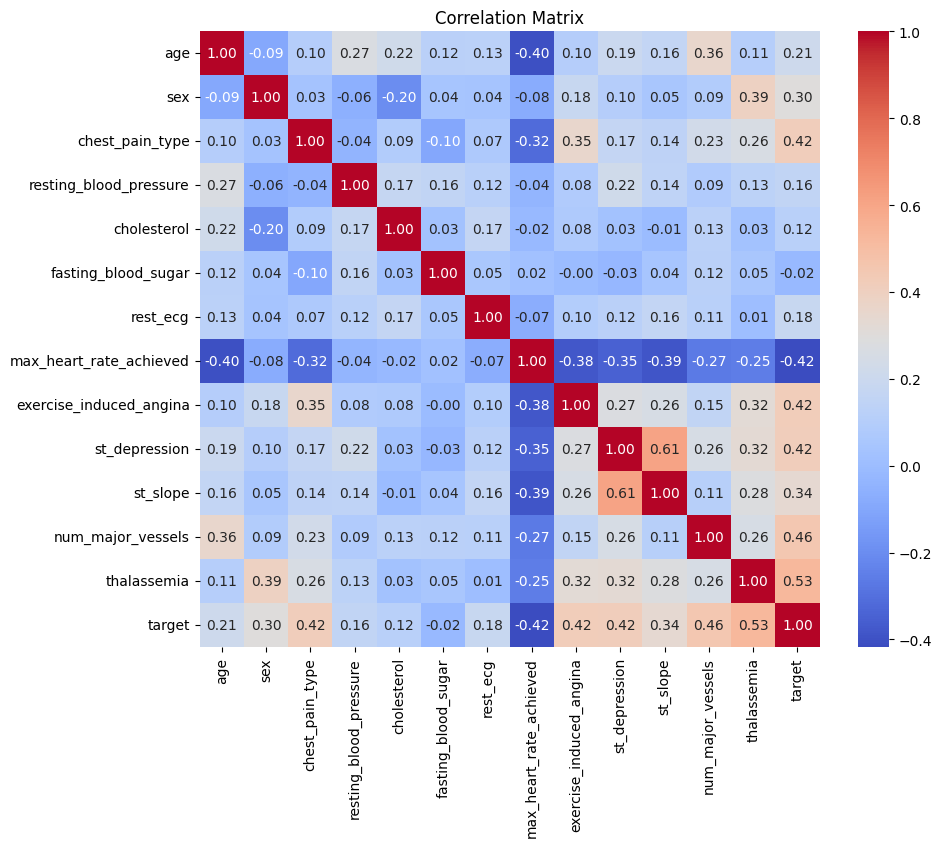

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터프레임 생성 (예시)
# 예: X_test는 테스트 데이터셋
data = dt.copy()

# 상관계수 행렬 계산
correlation_matrix = data.corr()

# 상관계수 히트맵
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

##  **3. 모델 학습**

### **3-1. 데이터셋 분할**

In [15]:
X_train, X_test, y_train, y_test = train_test_split(dt.drop('target', axis=1), dt['target'], test_size=0.2, random_state=10)

### **3-2. 데이터 셋의 크기 확인**

In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape #데이터셋 크기 확인

((216, 13), (54, 13), (216,), (54,))

### **3-3. 랜덤 포레스트 모델 생성 및 훈련**
* Random Forest: 여러 개의 결정 트리(Decision Tree)로 구성된 앙상블 모델

In [17]:
model = RandomForestClassifier(max_depth=5)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

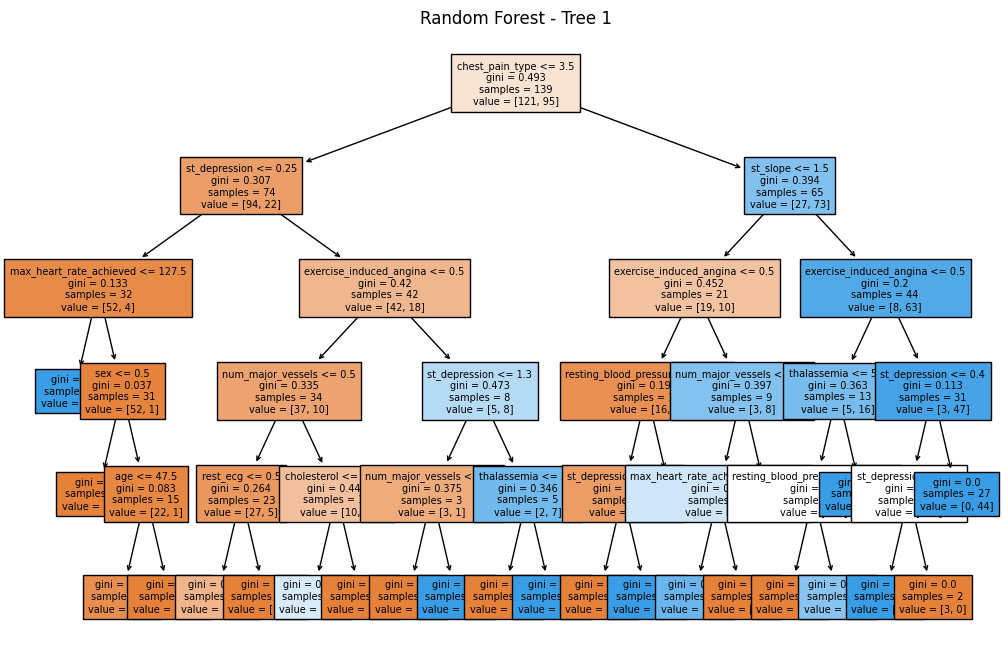

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# 랜덤 포레스트 모델 생성 및 학습
#model = RandomForestClassifier(max_depth=5, random_state=42)
#model.fit(X_train, y_train)

# 랜덤 포레스트의 첫 번째 트리 시각화
plt.figure(figsize=(12, 8))
tree_to_plot = model.estimators_[99]  # 100번째 트리 선택
plot_tree(tree_to_plot, feature_names=X_train.columns, filled=True, fontsize=7)
plt.title("Random Forest - Tree 1")
plt.show()

### **3-4. 예측 수행**

In [19]:
y_predict = model.predict(X_test)

### **3-5. 예측 결과 확인**

- 혼동 행렬(Confusion matrix) 생성 및 시각화
  - Accuracy: 모델이 올바르게 예측한 샘플의 비율   
  - Specificity (특이도): 모델이 특정 클래스를 잘못 예측하지 않는 비율  
  - Precision: 특정 클래스라고 예측한 샘플 중 실제로 해당 클래스인 비율
  - Recall: 실제 특정 클래스인 샘플 중 모델이 올바르게 예측한 비율   

<img src="Contents_XAI/classification_matrix.png" alt="Confusion Matrix" width="800">

<img src="Contents_XAI/classification_matrix2.png" alt="Confusion Matrix2" width="800">

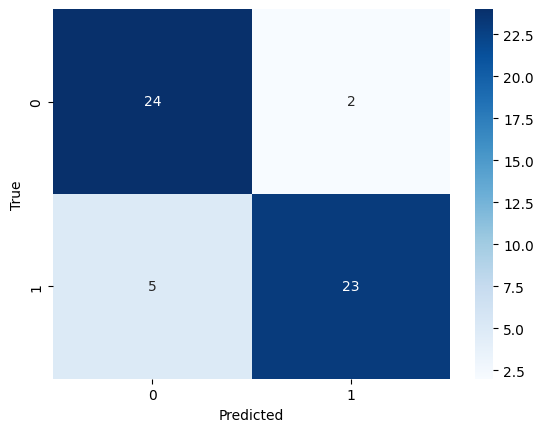

In [20]:
# Confusion Matrix 출력
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

- Accuracy, Precision, Recall 확인

In [21]:
acc = accuracy_score(y_test, y_predict)
print('accuracy_score : ',acc)

pre = precision_score(y_test, y_predict)
print('precision_score : ', pre)

recall = recall_score(y_test, y_predict)
print('recall_score: ', recall)

accuracy_score :  0.8703703703703703
precision_score :  0.92
recall_score:  0.8214285714285714


##  **4. 예측 결과 해석(The Explanation)**

In [22]:
model[2]

DecisionTreeClassifier(max_depth=5, max_features='auto',
                       random_state=1228959102)

In [23]:
for i, tree in enumerate(model.estimators_):
    print(f"Tree {i}: {tree}")

Tree 0: DecisionTreeClassifier(max_depth=5, max_features='auto', random_state=843828734)
Tree 1: DecisionTreeClassifier(max_depth=5, max_features='auto', random_state=914636141)
Tree 2: DecisionTreeClassifier(max_depth=5, max_features='auto',
                       random_state=1228959102)
Tree 3: DecisionTreeClassifier(max_depth=5, max_features='auto',
                       random_state=1840268610)
Tree 4: DecisionTreeClassifier(max_depth=5, max_features='auto', random_state=974319580)
Tree 5: DecisionTreeClassifier(max_depth=5, max_features='auto', random_state=819844194)
Tree 6: DecisionTreeClassifier(max_depth=5, max_features='auto', random_state=220395238)
Tree 7: DecisionTreeClassifier(max_depth=5, max_features='auto', random_state=941243409)
Tree 8: DecisionTreeClassifier(max_depth=5, max_features='auto', random_state=942612051)
Tree 9: DecisionTreeClassifier(max_depth=5, max_features='auto',
                       random_state=2109339754)
Tree 10: DecisionTreeClassifier(max_de

###  **4-1. 랜덤 포레스트(RandomForest feature Importance)**
* 모델의 학습 과정에서 각 특징이 얼마나 중요한 역할을 하는지를 평가
* 랜덤 포레스트 모델에서 각 변수의 중요도를 계산하고, 시각화 수행
* 어떤 변수가 모델의 예측에 중요한 역할을 하는지 평가

In [24]:
importance = model.feature_importances_ #랜덤 포레스트가 학습 과정에서 계산한 각 특성의 중요도를 반환
feature = X_train.columns #데이터프레임의 열 이름(특성 이름)을 가져옴
importances = pd.DataFrame() #빈 데이터프레임을 생성
importances['feature'] = feature #importances 데이터프레임의 'feature' 열에 특성 이름을 저장
importances['importances'] = importance #importances 데이터프레임의 'importances' 열에 특성 중요도를 저장

importances.sort_values('importances', ascending=False, inplace=True) 
#특성 중요도를 기준으로 데이터프레임을 내림차순 정렬
#ascending=False: 내림차순 옵션
#inplace=True: 정렬된 결과를 원본 데이터프레임에 적용

importances.reset_index(drop=True, inplace=True) 
#데이터프레임을 재정렬한 후 인덱스를 초기화
#drop=True: 기존 인덱스를 제거하고 새로 생성된 인덱스를 사용
#inplace=True: 변경 내용을 데이터프레임에 적용

importances

feature  importances
0           chest_pain_type     0.163103
1               thalassemia     0.134745
2   max_heart_rate_achieved     0.125490
3             st_depression     0.117849
4         num_major_vessels     0.096406
5    resting_blood_pressure     0.071997
6                       age     0.065991
7               cholesterol     0.064327
8   exercise_induced_angina     0.057425
9                  st_slope     0.054613
10                      sex     0.027748
11                 rest_ecg     0.013191
12      fasting_blood_sugar     0.007114

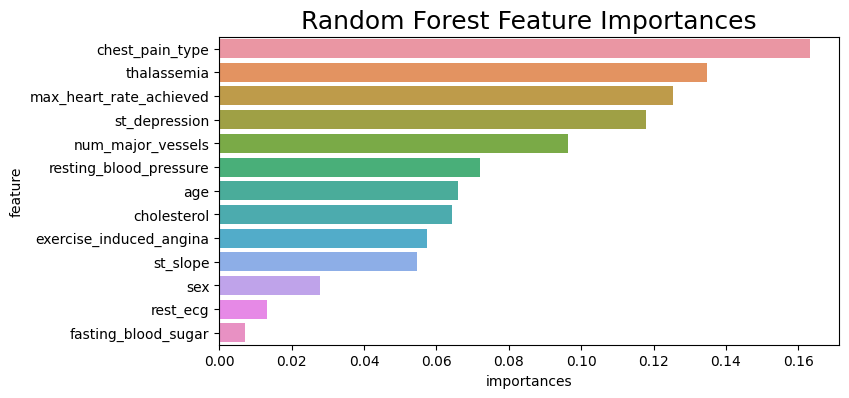

In [25]:
plt.figure(figsize=(8, 4))
sns.barplot(x='importances', y='feature', data=importances)
plt.title('Random Forest Feature Importances', fontsize=18)
plt.show()

###  **4-2. Permutation Importance**
* Permutation Importance를 통해 각 변수의 중요도를 측정
* 모델이 예측에 크게 의존하는 변수를 무작위로 섞어 모델 성능이 얼마나 감소하는지를 평가
* Weight
    * 각 특징이 모델의 예측에 기여하는 정도
* ± 값 (Standard Deviation)
    * 여러 번의 무작위 섞기에서 얻어진 결과의 표준 편차
    * 값이 크면 그 특징의 중요도가 불안정하거나 데이터의 변화에 민감
* 값이 0 또는 음수
    * 해당 특징을 섞었을 때 모델 성능이 크게 변하지 않거나 오히려 성능이 향상을 의미 
    * 해당 특징이 예측에 거의 기여하지 않음

<img src="Contents_XAI/PI.png" alt="Permutation Importance" width="800">

In [26]:
perm = PermutationImportance(model, random_state=1).fit(X_test, y_test) #Permutation Importance 객체 생성 후 학습
eli5.show_weights(perm, feature_names = X_test.columns.tolist()) #특성 중요도를 시각화하여 출력

###  **4-3. PDP & ICE**

####  **4-3-(1). PDP**
* 특정 변수(또는 변수 그룹)의 값이 모델 예측 결과에 미치는 평균적인 영향을 시각적으로 표현
* 모델의 예측값이 해당 변수에 따라 어떻게 변하는지를 확인
* 다른 모든 변수들은 고정된 상태로 두고, 관심 있는 변수만 변화시켜 그에 따른 예측값의 변화를 평균 내어 계산
* X축 
    * 변수의 값을 의미
    * 이 변수의 값이 변화함에 따라 모델의 예측이 어떻게 변하는지 보여줌
* Y축 (Partial dependence)
    * 특정 변수 값에서의 부분 종속성을 의미
    * 이 값은 모델이 다른 모든 변수들의 평균적인 영향을 고려한 상태에서, 변수값에 따라 예측 확률이 어떻게 변화하는지 보여줌

In [27]:
feature_names=X_train.columns

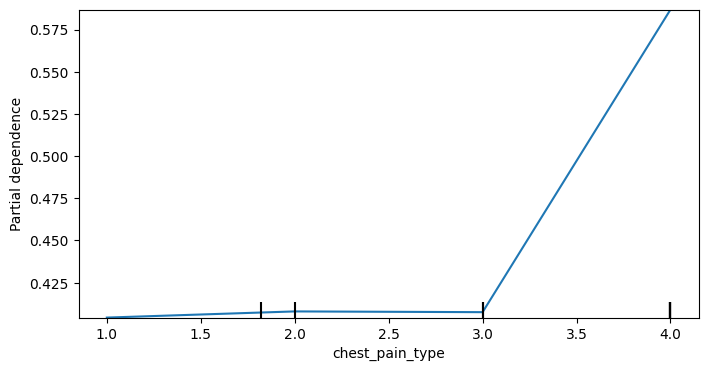

In [28]:
fig = plt.figure(figsize=(8, 4)) #새로운 플롯(fig) 생성
fig.set_facecolor('white') #그래프의 배경색을 흰색으로 설정
ax = fig.add_subplot() ##그래프의 축 추가
feature_name = 'chest_pain_type' #관심 변수 지정
PartialDependenceDisplay.from_estimator(model, ## 학습 모델
                                        X_test, ## 의존도 계산시 필요한 데이터
                                        [feature_name], ## 관심 변수
                                        feature_names=feature_names, ## 변수 이름
                                        kind='average', ## average = pdp, individual = ice
                                        ax=ax
                                       )

####  **4-3-(2). ICE**
* 특정 변수의 값이 변화할 때, 개별 샘플이 모델에서 예측하는 결과가 어떻게 변하는지를 시각화
* PDP가 전체 데이터의 평균적인 경향을 보여주는 반면, ICE 플롯은 개별 데이터 포인트에 대해 변수의 영향을 시각화
* 모델의 개별적(local) 해석에 유용

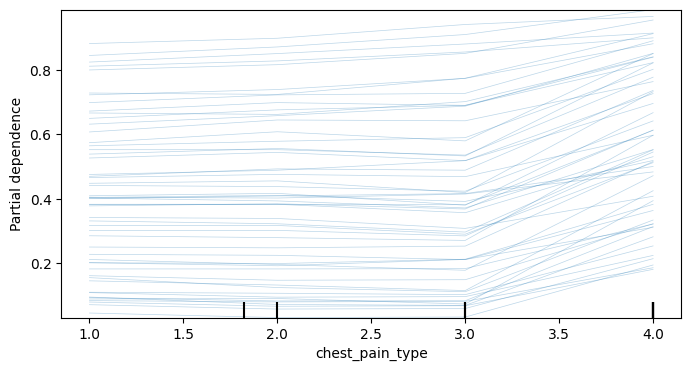

In [29]:
fig = plt.figure(figsize=(8, 4))
fig.set_facecolor('white')
ax = fig.add_subplot()
feature_name = 'chest_pain_type'
PartialDependenceDisplay.from_estimator(model, ## 학습 모델
                                        X_test, ## 의존도 계산시 필요한 데이터
                                        [feature_name], ## 관심 변수
                                        feature_names=feature_names, ## 변수 이름
                                        kind='individual', # 개별 데이터 포인트마다 예측값의 변화를 시각화
                                        ax=ax
                                       )

####  **4-3-(3). PDP & ICE 동시에 시각화**

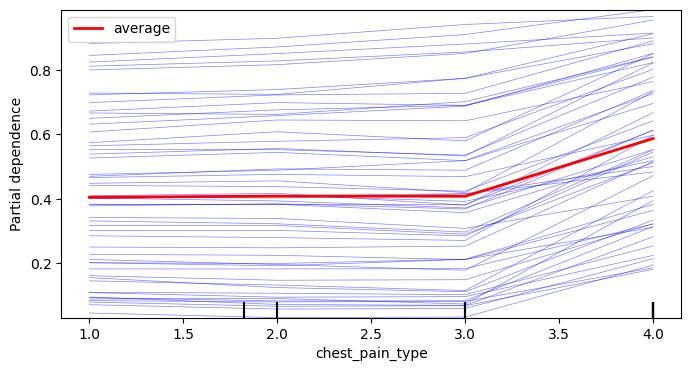

In [30]:
fig = plt.figure(figsize=(8, 4))
fig.set_facecolor('white')
ax = fig.add_subplot()
feature_name = 'chest_pain_type'
PartialDependenceDisplay.from_estimator(model, ## 학습 모델
                                        X_test, ## 의존도 계산시 필요한 데이터
                                        [feature_name], ## 관심 변수
                                        feature_names=feature_names, ## 변수 이름
                                        kind='both',
                                        ice_lines_kw={'color':'blue', 'alpha':0.5}, ## ice 선 스타일 #color:색상, alpha:투명도 
                                        pd_line_kw={'color':'red', 'linewidth':2}, ## pdp 선 스타일 #color:색상, linewidth: 곡선 두께
                                        ax=ax
                                       )

####  **4-3-(4). 두 변수의 조합이 모델의 예측에 어떻게 영향 시각화**
* 색상
    * 모델의 예측값(종속성)을 의미
    * 색상이 밝을수록 예측값이 높고, 색상이 어두울수록 예측값이 낮음. 
    * 예를 들어, 노란색 영역은 높은 예측값을, 보라색 영역은 낮은 예측값을 의미
* 등고선
    * 그래프에 표시된 숫자들은 예측값의 등고선(contour)을 의미 
    * 같은 예측값을 가지는 지점들을 연결하여, 변수들의 조합이 예측값에 어떤 영향을 미치는지를 시각적으로 표현

In [31]:
feature_names

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia'],
      dtype='object')

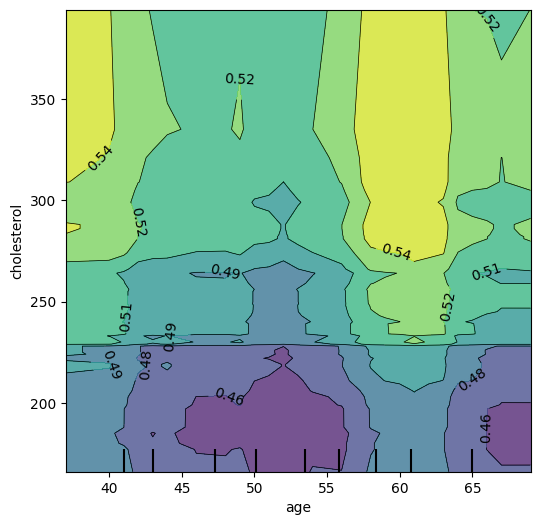

In [32]:
feature_name = ['age', 'cholesterol']
fig, ax = plt.subplots(figsize=(6, 6))
PartialDependenceDisplay.from_estimator(estimator=model, 
                                        X=X_test, 
                                        features=[feature_name],
                                        feature_names=feature_names,
                                        kind='average',
                                        ax=ax)

###  **4-4. SHAP**
* 각 특징이 모델의 예측에 얼마나 기여했는지를 설명
* 게임 이론에서 유래한 Shapley 값을 기반으로 하며, 모든 가능한 특징 조합에 대한 기여도를 계산하여 각 특징의 중요도를 평가

####  **4-4-(1). SHAP Summary Plot(막대 그래프(bar plot) 형식)**
*  각 특징(feature)이 모델 예측에 미치는 평균적인 영향력 확인
* X축
    * 각 특징의 평균 SHAP 값(절대값) 
    * 값이 클수록 해당 특징이 모델 예측에 더 큰 영향을 미쳤음을 의미
* Y축
    * 모델에 사용된 특징들의 이름
    * 특징들은 중요도에 따라 내림차순 정렬

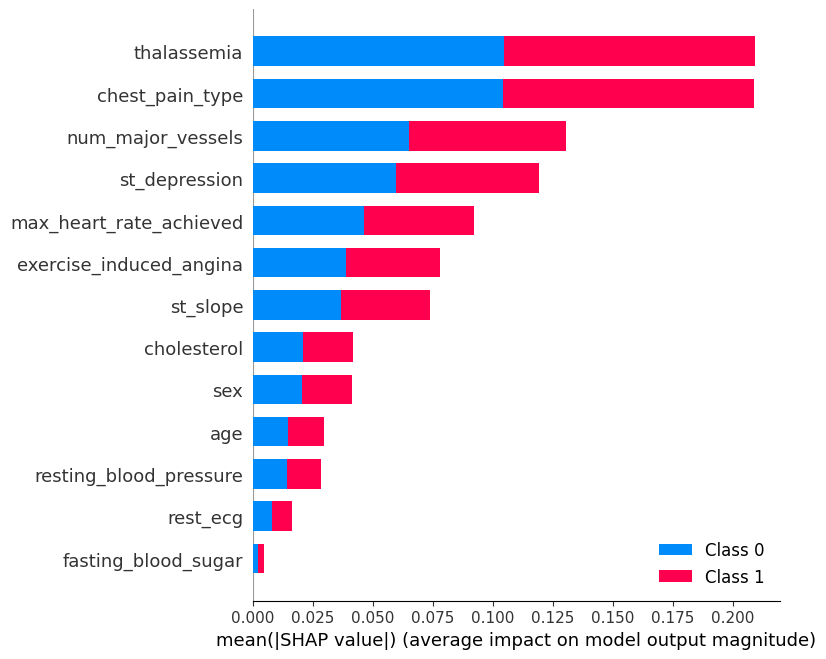

In [33]:
explainer = shap.TreeExplainer(model) # TreeExplainer 객체 생성
#SHAP에서 제공하는 트리 기반 모델 전용 해석기(XGBoost, LightGBM, CatBoost ..)

shap_values = explainer.shap_values(X_test) #SHAP값 산출
#X_test(테스트 데이터셋)의 각 샘플에 대해 계산된 **SHAP 값(특징별 기여도)

#shap.summary_plot(shap_values=shap_values[1], features=X_test,plot_type="bar")
shap.summary_plot(shap_values, X_test, plot_type="bar")
#SHAP 값의 요약 정보를 시각화
#shap_values: 각 특성이 예측값에 기여한 정도
#features: 현재 샘플의 입력 값.
#plot_type="bar": 막대(bar) 형태의 그래프를 생성

####  **4-4-(2). SHAP Summary Plot(점 그래프(dot plot) 형식)**
* 각 특징이 모델 예측에 미치는 영향력 시각화
* 각 특징의 값이 어떻게 예측값에 영향을 미치는지를 시각화
* X축
    * 각 특징의 SHAP 값 
    * SHAP 값이 양수이면 해당 특징이 예측값 증가시키고, 음수이면 예측값 감소시킴
* Y축
    * 모델에 사용된 특징들
    * 특징들은 중요도에 따라 내림차순으로 정렬
* 점의 색상
    * 해당 특징의 값
    * 파란색은 낮은 값을, 빨간색은 높은 값을 의미, 보라색은 중간 정도의 값을 의미
    * 어떤 특징 값이 낮을 때 예측값을 감소시키는지, 높은 값이 예측값을 증가시키는지 확인

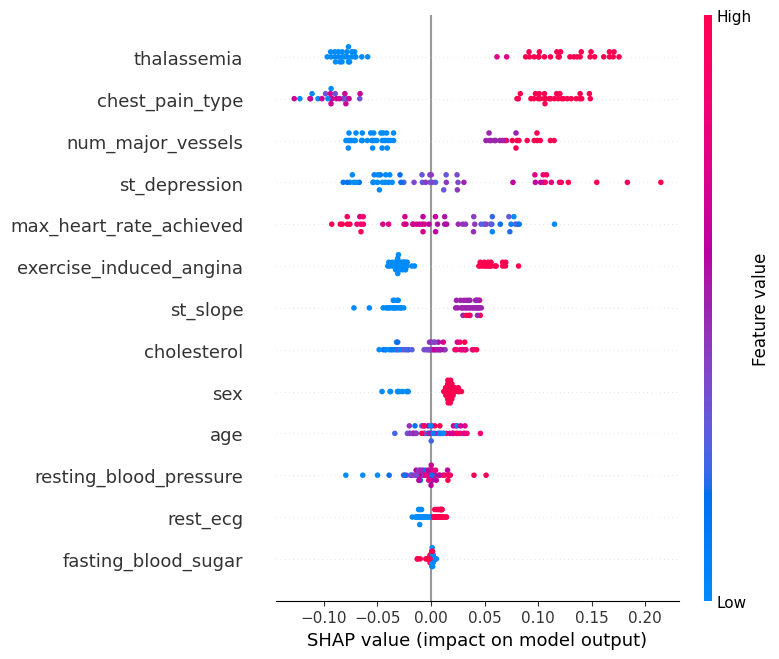

In [34]:
#shap.summary_plot(shap_values[1], X_test, plot_type='dot') # 기본 설정은 dot
shap.summary_plot(shap_values[1], X_test)

####  **4-4-(3). SHAP Force Plot (단일 데이터 포인트)**
* 특정 데이터 포인트(환자)에 대해 모델이 예측한 결과를 해석
* Base Value(expected_value)
    * 중앙에 있는 숫자
    * 모델이 학습 데이터에서 평균적으로 예측한 값
    * 데이터셋 전체에서의 평균적인 예측값(심장병 발생 가능성의 평균 확률)을 의미
* SHAP Value(shap_values)
    * 그래프의 각 화살표는 개별 특징이 이 예측값을 어떻게 변경했는지를 의미
    * 모델의 예측 결과에 대해 각 특성이 얼마나 기여했는지를 수치화한 값
    * 붉은색 화살표: 해당 특징이 예측값을 증가시키는 방향으로 작용했음을 의미
    * 파란색 화살표: 해당 특징이 예측값을 감소시키는 방향으로 작용했음을 의미
    * 각 화살표의 길이는 해당 특징이 예측값에 미친 기여도(영향력)의 크기를 의미

In [35]:
patient = X_test.iloc[1,:].astype(float) #테스트 데이터의 3번째 샘플을 추출 및 실수형으로 변환
explainer = shap.TreeExplainer(model)
shap.initjs() #SHAP 시각화를 위한 JavaScript 라이브러리 초기화
shap_values = explainer.shap_values(patient) # 입력된 데이터에 대해 각 특성(feature)이 모델 예측에 미친 영향을 계산한 SHAP 값
shap.force_plot(base_value=explainer.expected_value[1], shap_values=shap_values[1], features=patient, feature_names=feature_names, figsize=(2,10))
#base_value: 모델이 평균적으로 예측하는 값.
#shap_values: 각 특성이 예측값에 기여한 정도
#features: 현재 샘플의 입력 값.
#feature_names: 그래프에 표시될 특성 이름.
#figsize: 그래프 크기 설정.

In [36]:
def heart_disease_risk_factors(model, patient):
    explainer = shap.TreeExplainer(model)
    shap.initjs() #SHAP 시각화를 위한 JavaScript 라이브러리를 초기화. (Jupyter Notebook 환경에서 필요한 설정)
    shap_values = explainer.shap_values(patient) # 입력된 patient 데이터에 대해 각 특성(feature)이 모델 예측에 미친 영향을 계산한 SHAP 값
    return shap.force_plot(explainer.expected_value[1], shap_values[1], patient)
    

In [37]:
data_for_prediction = X_test.iloc[2,:].astype(float) 
heart_disease_risk_factors(model, data_for_prediction)

In [38]:
data_for_prediction = X_test.iloc[3,:].astype(float)
heart_disease_risk_factors(model, data_for_prediction)

####  **4-4-(4). SHAP 의존성 플롯(dependence plot)**
* 특정 특징이 모델의 예측에 미치는 영향을 시각화
* 다른 특징과의 상호작용도 함께 시각화
* X축
    * 주요 특징
* Y축
    * 모델 예측에 미치는 영향(SHAP Value)
    * SHAP 값이 양수이면, 값이 높을수록 모델의 예측값(심장병 발생 가능성)이 증가함을 의미
    * SHAP 값이 음수이면, 값이 낮을수록 모델의 예측값이 감소함을 의미
* 점의 색상
    * 두 번째 특징을 의미
    * 파란색: 두 번째 특징 값이 낮음
    * 빨간색: 두 번째 특징 값이 높음

In [39]:
feature_names

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia'],
      dtype='object')

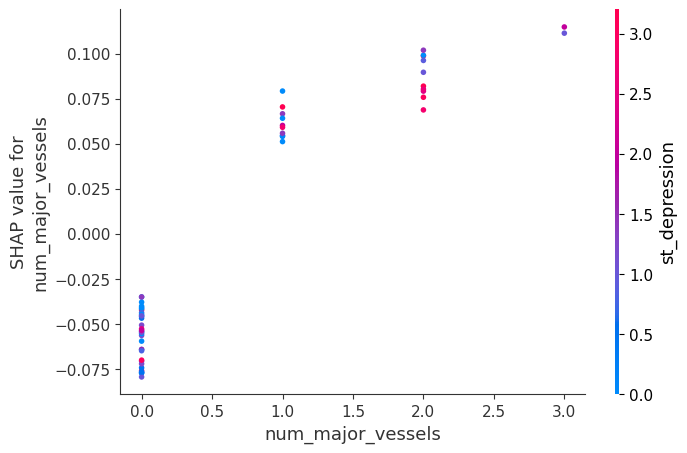

In [40]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
#shap.dependence_plot('num_major_vessels',shap_values= shap_values[1], features= X_test, interaction_index="st_depression")
shap.dependence_plot(ind='num_major_vessels',shap_values=shap_values[1],features=X_test,interaction_index= "st_depression")
#ind: 의존성을 분석할 주요 기준 특성
#shap_values: 각 특성이 예측값에 기여한 정도
#features: 현재 샘플의 입력 값
#interaction_index:기준 특성과 상호작용 효과를 확인할 다른 특성

####  **4-4-(5). SHAP Force Plot (다수의 데이터 포인트)**
* 특정 데이터 포인트들의 모델 예측에 대한 해석을 시각화
* 각각의 데이터 포인트가 모델 예측에 어떤 영향을 미쳤는지를 시각화
* X축:
    * 데이터 포인트  
    * 각 샘플의 순서는 sample order by similarity에 따라 정렬되어, 유사한 예측 패턴을 가진 샘플들이 함께 그룹화
* Y축:
    * 모델 예측에 미치는 영향(SHAP Value) 
    * 특정 샘플에서 각 특징이 예측에 미친 영향을 의미
    * 값이 양수이면 해당 특징이 예측값을 증가시키는 방향으로 기여했음을 의미
    * 음수이면 예측값을 감소시키는 방향으로 기여했음을 의미
* 색상:
    * 붉은색은 모델의 예측값을 증가시키는 특징들을 의미
    * 파란색은 모델의 예측값을 감소시키는 특징들을 의미
    * 붉은색 영역이 넓을수록, 해당 샘플에서 모델이 예측값을 높이는 방향으로 강하게 작용했다는 것을 의미
    * 파란색 영역이 넓을수록 예측값을 낮추는 방향으로 강하게 작용했다는 것을 의미


In [41]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train.iloc[:50]) #X_train.iloc[:50]:학습 데이터셋 중 첫 50개의 샘플
#shap.force_plot(explainer.expected_value[1], shap_values[1], X_test.iloc[:50])
#shap.plots.force(base_value=explainer.expected_value[1], shap_values=shap_values[1], features=X_test.iloc[:50],figsize=(2,8))
shap.plots.force(explainer.expected_value[1], shap_values[1], X_test.iloc[:50],figsize=(2,8))

###  **4-5. LIME**
* 블랙박스 모델의 예측을 해석 가능하게 만드는 기법
* 단일 데이터 포인트 주변에 간단하고 해석 가능한 Surrogate Model을 학습시켜, 특정 예측 결과를 설명
* Prediction Probabilities
    * 모델이 특정 클래스에 대해 예측한 확률값
* Feature Contributions
    * 각 특징의 모델 예측 기여도
    * 형식: [('특성 설명', 기여도), ...]
    * 특성 설명
        * 특정 특성의 범위
    * 기여도
        * 양수: 해당 특성이 현재 예측 클래스를 지지
        * 음수: 해당 특성이 현재 다른 클래스를 지지
* Feature Values
    * 해석 대상 데이터 포인트의 실제 값

<img src="Contents_XAI/Lime.jpg" alt="Confusion Matrix" width="1000">

- LimeTabularExplainer 객체 생성 테이블 형식 데이터를 해석하기 위한 LIME 해석기

In [42]:
interpretor = lime_tabular.LimeTabularExplainer( #테이블 형식 데이터를 처리하기 위한 해석기
    training_data=X_train.values, #or np.array(X_train)
    feature_names=X_train.columns,
    mode='classification') #회귀 문제일 경우mode='regression'

- 특정 데이터 포인트에 대한 해석 생성

In [43]:
exp = interpretor.explain_instance( #특정 데이터 포인트에 대해 모델의 예측을 해석
      data_row=X_test.iloc[10], #data_row: 해석하려는 테스트 데이터의 특정 샘플
      predict_fn=model.predict_proba #IME이 모델의 예측을 해석할 때 사용하는 함수 #회귀 문제일 경우 predict_fn=predict
  )

X does not have valid feature names, but RandomForestClassifier was fitted with feature names


In [44]:
exp.as_list() #해석 결과를 리스트로 출력

[('3.00 < thalassemia <= 7.00', 0.17217567932776476),
 ('3.00 < chest_pain_type <= 4.00', 0.1666547385703236),
 ('st_depression > 1.60', 0.14429418237811126),
 ('num_major_vessels > 1.00', 0.1255547345502031),
 ('max_heart_rate_achieved <= 133.75', 0.09474615709717736),
 ('0.00 < exercise_induced_angina <= 1.00', 0.07012415775466121),
 ('1.00 < st_slope <= 2.00', 0.06479051501879257),
 ('0.00 < sex <= 1.00', 0.05030569816186832),
 ('cholesterol <= 212.00', -0.04935839324520312),
 ('56.00 < age <= 62.00', 0.022641961661759396)]

In [45]:
exp.show_in_notebook(show_table=True) #Jupyter Notebook 환경에서 해석 결과 시각화

In [46]:
# This function will show how a feature is pushing towards 0 or 1
def interpret_with_lime(model, X_train, X_test, Test_Data):
  # New data
  interpretor = lime_tabular.LimeTabularExplainer( #테이블 형식 데이터를 처리하기 위한 해석기
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    mode='classification') #회귀 문제일 경우mode='regression'

 
  exp = interpretor.explain_instance( #특정 데이터 포인트에 대해 모델의 예측을 해석
      data_row=Test_Data, #data_row: 해석하려는 테스트 데이터의 특정 샘플
      predict_fn=model.predict_proba #IME이 모델의 예측을 해석할 때 사용하는 함수 #회귀 문제일 경우 predict_fn=predict
  )

  exp.show_in_notebook(show_table=True) #Jupyter Notebook 환경에서 해석 결과 시각화

In [47]:
Test_Data=X_test.iloc[10]
interpret_with_lime(model,X_train, X_test, Test_Data)

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
